In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

!pip install squarify
import squarify

#np.random(42)

%config InlineBackend.figure_format = 'retina'

In [2]:
def get_tree_colors(value_series):
  # Get colours
  cmap = matplotlib.cm.prism # coolwarm
  # Min and Max Values
  mini = min(value_series); maxi = max(value_series)
  # Finding Colors for each tile
  norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
  colors = [cmap(norm(value)) for value in value_series]
  return colors

In [3]:
# Take a random sample of x records from DataFrame y:
def sample(df,number_of_records):
  display(df.loc[np.random.choice(len(df),number_of_records),:])
  #print('DataFrame has length',len(df), 'and shape',df.shape,'.')
  print(f'Random sample of {number_of_records} rows from DataFrame with {df.shape[0]} records and {df.shape[1]} columns.')


In [4]:
# Load files from GitHub; add year labels
path = 'https://raw.githubusercontent.com/VernonNaidoo-Toronto/Understanding-Toronto-Shelters/master/Shelter%20Data/'
dso2017 = pd.read_csv(path + 'daily-shelter-occupancy-2017-csv.csv', 
                    parse_dates=['OCCUPANCY_DATE']); dso2017['source_file']=2017
dso2018 = pd.read_csv(path + 'daily-shelter-occupancy-2018-csv.csv',
                    parse_dates=['OCCUPANCY_DATE']); dso2018['source_file']=2018
dso2019 = pd.read_csv(path + 'daily-shelter-occupancy-2019-csv.csv',
                    parse_dates=['OCCUPANCY_DATE']); dso2019['source_file']=2019

# Get summary of records loaded
for year, df in [[2017,dso2017], [2018,dso2018], [2019,dso2019]]:
  print(f'Loaded {df.shape[0]} records and {df.shape[1]} columns from the {year} file.')

Loaded 38700 records and 14 columns from the 2017 file.
Loaded 37770 records and 14 columns from the 2018 file.
Loaded 39446 records and 14 columns from the 2019 file.


In [9]:
# Concatenate DataFrames
daily_shelter_occupancy = pd.concat([dso2017, dso2018, dso2019], ignore_index=True) 

# Get list of column names; change to Python standard lowercase:
cols = [column_name.lower() for column_name in daily_shelter_occupancy.columns] 
daily_shelter_occupancy.columns = cols

# Move source_file column to front of DataFrame
cols = cols[-1:] + cols[0:-1]
daily_shelter_occupancy = daily_shelter_occupancy[cols]

# Show sample records
daily_shelter_occupancy.head()

,source_file,_id,occupancy_date,organization_name,shelter_name,shelter_address,shelter_city,shelter_province,shelter_postal_code,facility_name,program_name,sector,occupancy,capacity
0,2017,1,2017-01-01,COSTI Immigrant Services,COSTI Reception Centre,100 Lippincott Street,Toronto,ON,M5S 2P1,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,16,16.0
1,2017,2,2017-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,13,17.0
2,2017,3,2017-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,63,63.0
3,2017,4,2017-01-01,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Centre,43 Christie Street,Toronto,ON,M6G 3B1,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,66,70.0
4,2017,5,2017-01-01,City of Toronto,Birchmount Residence,1673 Kingston Road,Toronto,ON,NaN,Birchmount Res 1673 Kingston Rd,Birchmount Residence,Men,58,60.0


In [8]:
# Identify columns with missing values:
for col in daily_shelter_occupancy.columns:
  null_count = daily_shelter_occupancy[col].isna().sum()
  if null_count >0:
    print(f'The {col} column has {null_count} rows without values.')

The shelter_postal_code column has 5494 rows without values.
The capacity column has 343 rows without values.


In [10]:
# Drop 343 rows with null capacity
original_row_count=daily_shelter_occupancy.shape[0]
daily_shelter_occupancy.dropna(subset=['capacity'], inplace=True)
dropped_row_count=original_row_count-daily_shelter_occupancy.shape[0]
print(f'Dropped {dropped_row_count} of {original_row_count} rows, due to nulls in capacity column.')

Dropped 343 of 115916 rows, due to nulls in capacity column.


In [12]:
# After removing nulls, change capacity column to integer
daily_shelter_occupancy.capacity = daily_shelter_occupancy.capacity.astype(int)

In [14]:
df =  daily_shelter_occupancy
df.head()

,source_file,_id,occupancy_date,organization_name,shelter_name,shelter_address,shelter_city,shelter_province,shelter_postal_code,facility_name,program_name,sector,occupancy,capacity
0,2017,1,2017-01-01,COSTI Immigrant Services,COSTI Reception Centre,100 Lippincott Street,Toronto,ON,M5S 2P1,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,16,16
1,2017,2,2017-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,13,17
2,2017,3,2017-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,63,63
3,2017,4,2017-01-01,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Centre,43 Christie Street,Toronto,ON,M6G 3B1,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,66,70
4,2017,5,2017-01-01,City of Toronto,Birchmount Residence,1673 Kingston Road,Toronto,ON,NaN,Birchmount Res 1673 Kingston Rd,Birchmount Residence,Men,58,60


In [18]:
dfCrime=pd.read_csv('MCI_2014_to_2019.csv')
dfCrime.drop(columns = ['X','Y','Index_','ucr_code','ucr_ext','reportedyear','reportedmonth','reportedday','reporteddayofyear',
                        'reporteddayofweek','occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek',
                        'Division','Hood_ID', 'ObjectId'],inplace =True)
dfCrime['Reported_Month_Year'] = pd.to_datetime(dfCrime['reporteddate']).dt.to_period('M')
dfCrime['Occurence_Month_Year'] = pd.to_datetime(dfCrime['occurrencedate']).dt.to_period('M')
dfCrime.head()

C:\Users\steve\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,event_unique_id,occurrencedate,reporteddate,premisetype,offence,reportedhour,occurrencehour,MCI,Neighbourhood,Long,Lat,Reported_Month_Year,Occurence_Month_Year
0,GO-20141756319,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Commercial,Assault,3,1,Assault,Malvern (132),-79.199081,43.800281,2014-03,2014-03
1,GO-20143006885,2014/09/27 00:00:00+00,2014/09/29 00:00:00+00,Other,B&E,10,16,Break and Enter,Bay Street Corridor (76),-79.386383,43.662472,2014-09,2014-09
2,GO-20141756802,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Commercial,B&E,7,6,Break and Enter,West Humber-Clairville (1),-79.612595,43.720406,2014-03,2014-03
3,GO-20141760570,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Apartment,B&E,23,15,Break and Enter,Don Valley Village (47),-79.349121,43.782772,2014-03,2014-03
4,GO-20142004859,2014/05/03 00:00:00+00,2014/05/03 00:00:00+00,Commercial,Robbery - Business,2,2,Robbery,Junction Area (90),-79.458778,43.664490,2014-05,2014-05


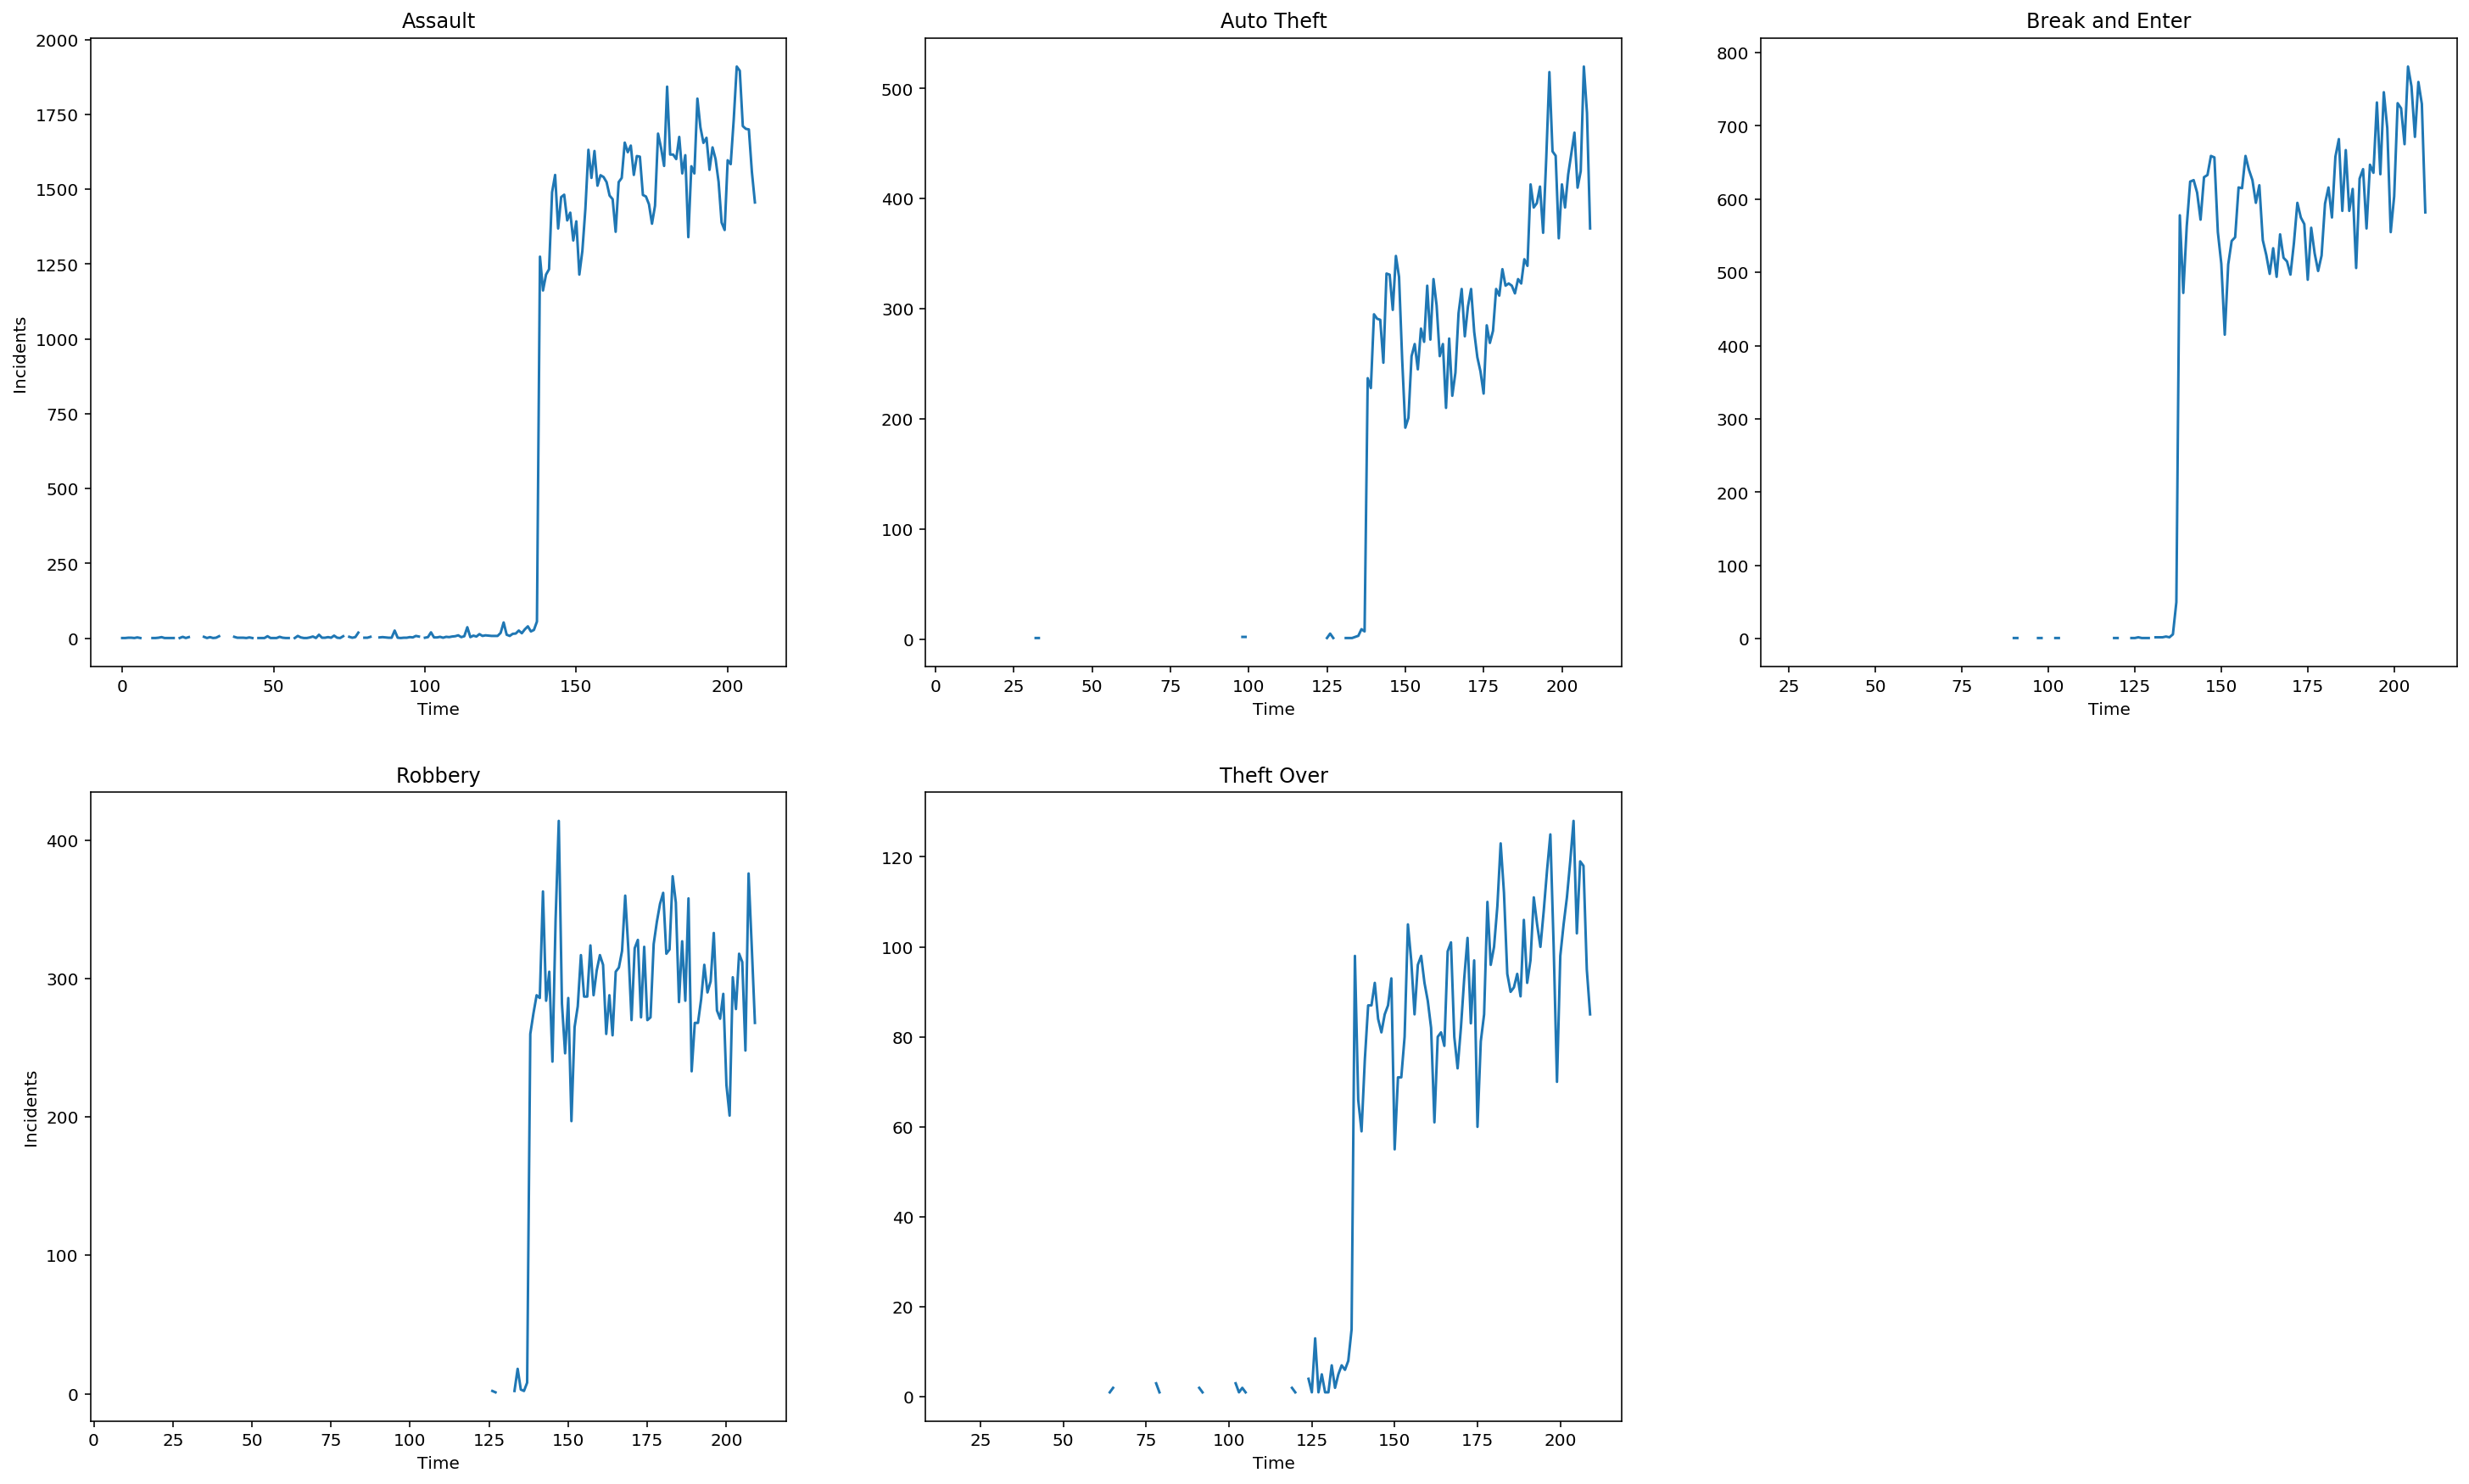

In [21]:
table= pd.pivot_table(dfCrime, values = 'event_unique_id',index=['Occurence_Month_Year'], columns=['MCI'], aggfunc='count')
y = table['Assault']['2017-01'::]

maxRange = len(table['Assault'])
x = list(range(maxRange))

fig = plt.figure(figsize=(25,15))

ax1 = fig.add_subplot(231)
ax1.set(title='Assault')
ax1.plot(x, table['Assault'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Incidents')

ax1 = fig.add_subplot(232)
ax1.set(title='Auto Theft')
ax1.plot(x, table['Auto Theft'])
ax1.set_xlabel('Time')

ax1 = fig.add_subplot(233)
ax1.set(title='Break and Enter')
ax1.plot(x, table['Break and Enter'])
ax1.set_xlabel('Time')

ax1 = fig.add_subplot(234)
ax1.set(title='Robbery')
ax1.plot(x, table['Robbery'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Incidents')

ax1 = fig.add_subplot(235)
ax1.set(title='Theft Over')
ax1.plot(x, table['Theft Over'])
ax1.set_xlabel('Time')


plt.show()

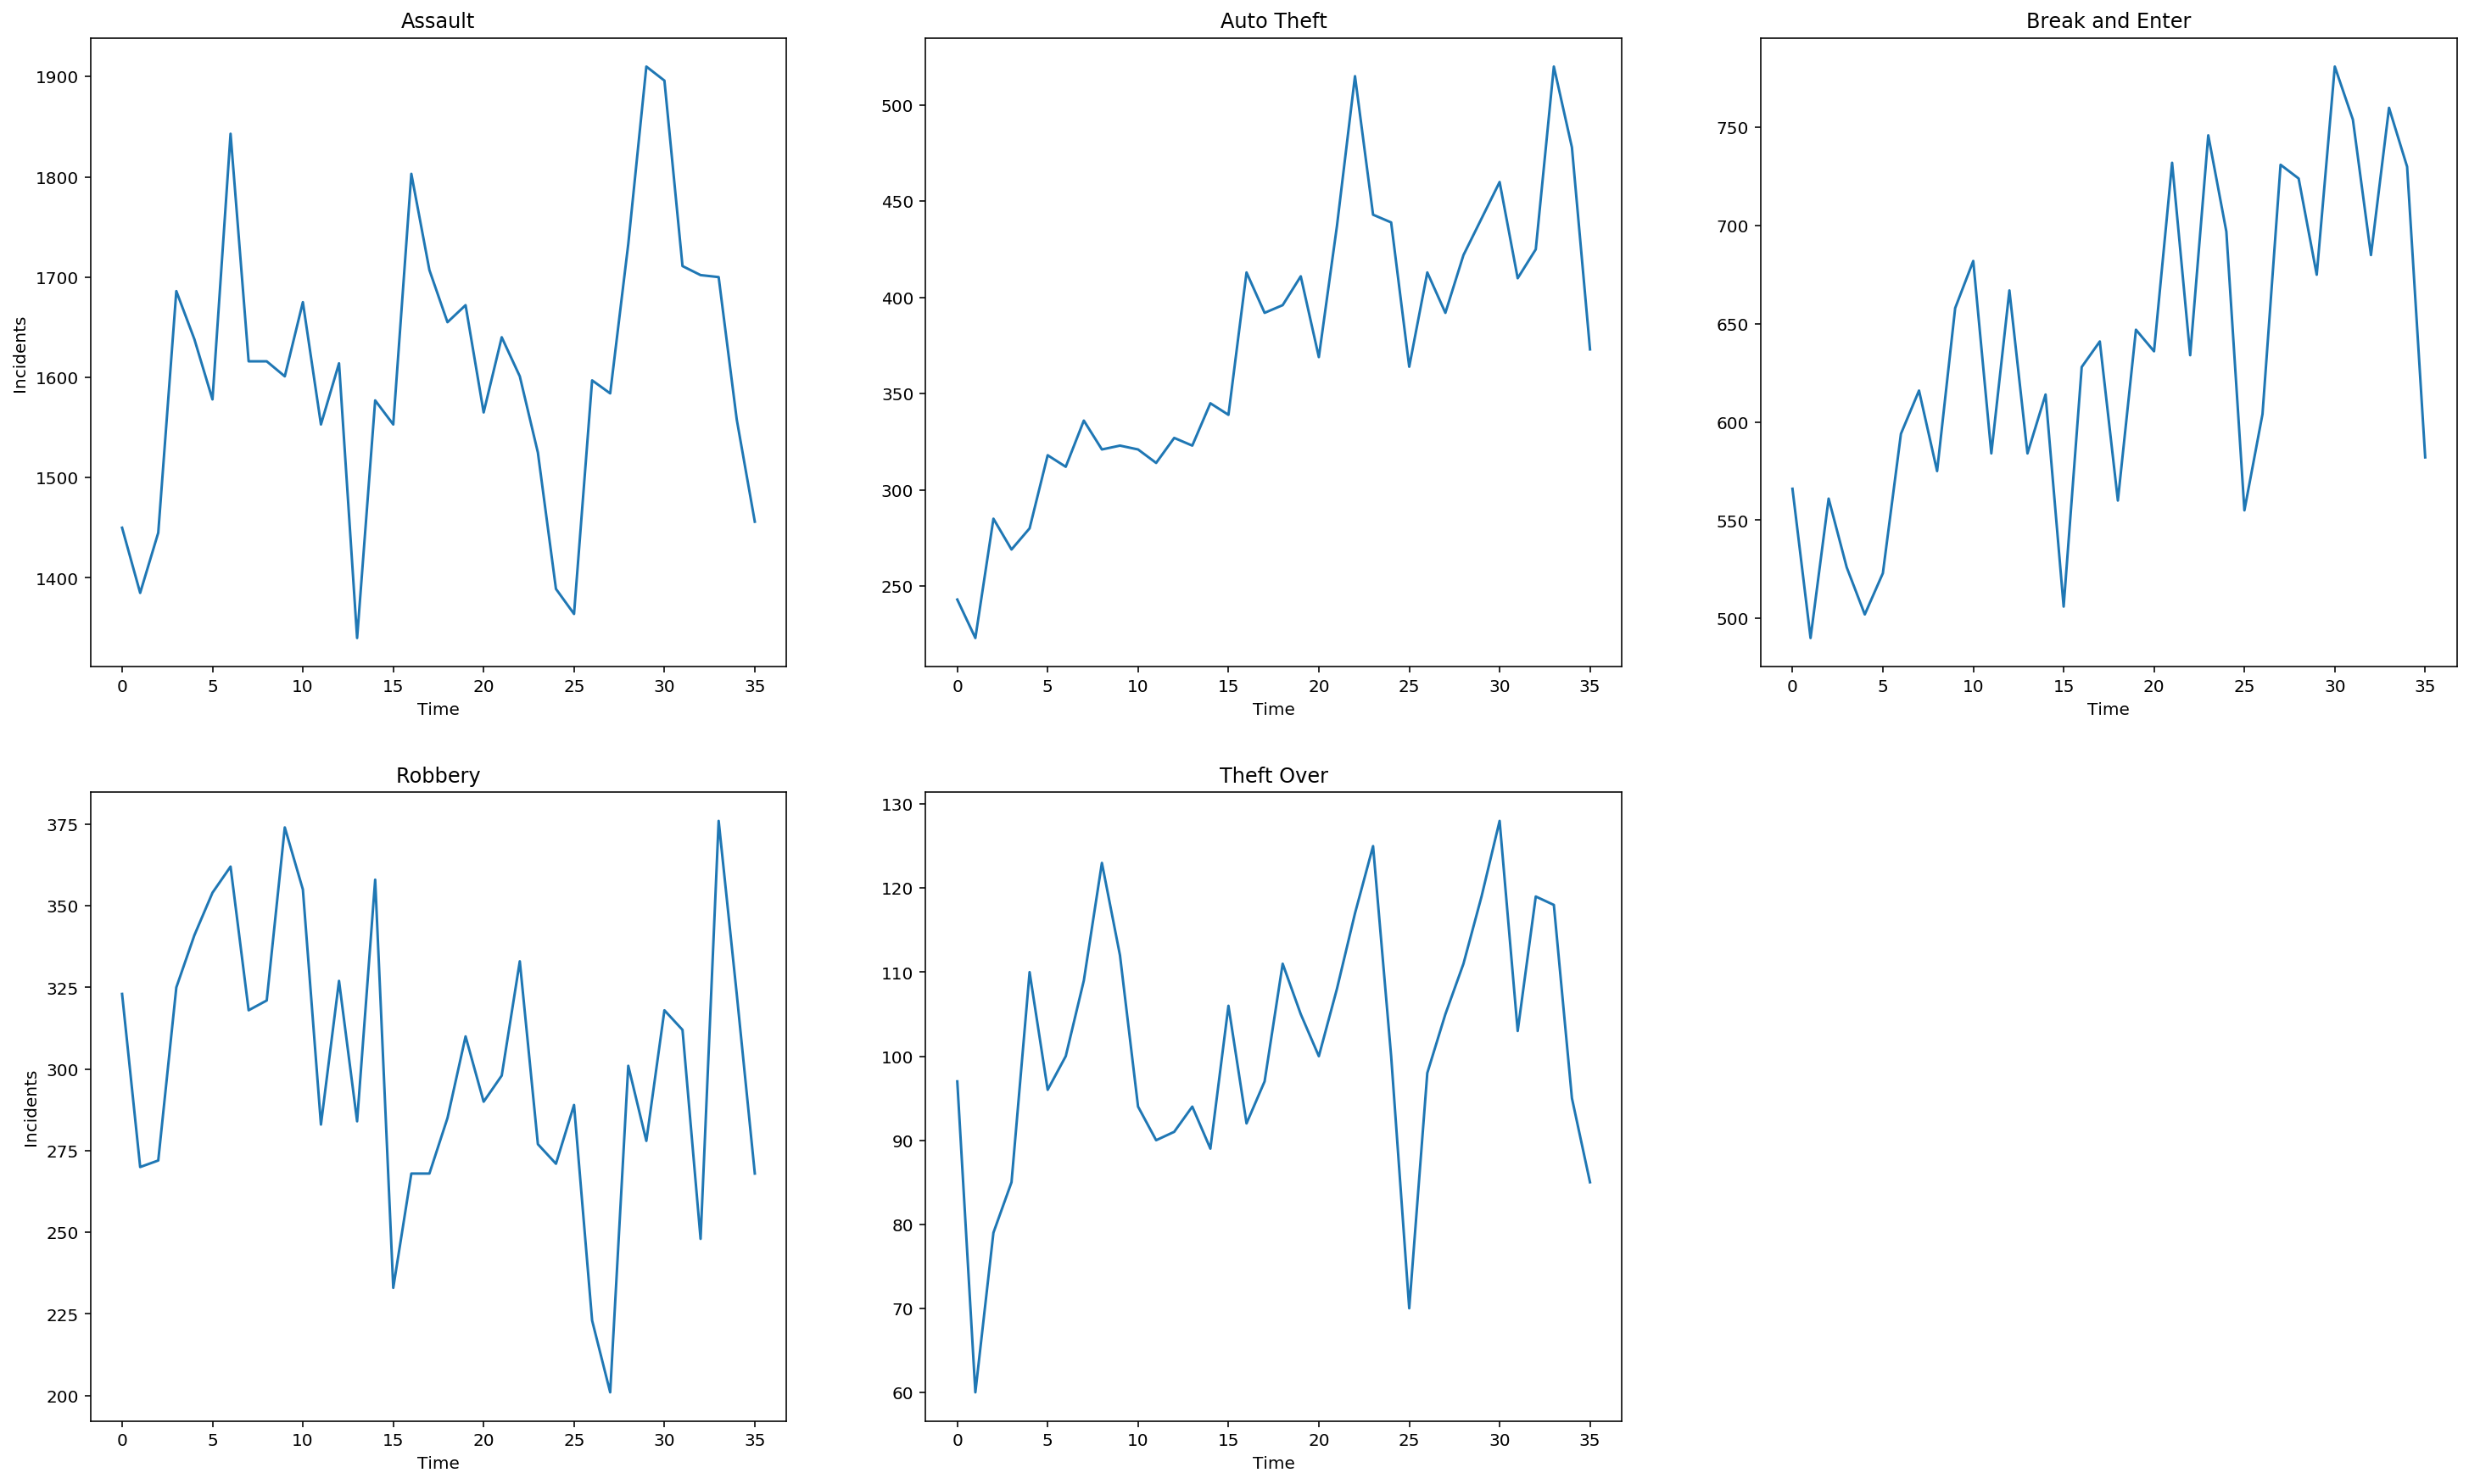

In [22]:
y = table['Assault']['2017-01'::]
x = list(range(72))
x1= list(range(36))

fig = plt.figure(figsize=(25,15))

ax1 = fig.add_subplot(231)
ax1.set(title='Assault')
ax1.plot(x1, table['Assault']['2017-01'::])
ax1.set_xlabel('Time')
ax1.set_ylabel('Incidents')

ax1 = fig.add_subplot(232)
ax1.set(title='Auto Theft')
ax1.plot(x1, table['Auto Theft']['2017-01'::])
ax1.set_xlabel('Time')

ax1 = fig.add_subplot(233)
ax1.set(title='Break and Enter')
ax1.plot(x1, table['Break and Enter']['2017-01'::])
ax1.set_xlabel('Time')

ax1 = fig.add_subplot(234)
ax1.set(title='Robbery')
ax1.plot(x1, table['Robbery']['2017-01'::])
ax1.set_xlabel('Time')
ax1.set_ylabel('Incidents')

ax1 = fig.add_subplot(235)
ax1.set(title='Theft Over')
ax1.plot(x1, table['Theft Over']['2017-01'::])
ax1.set_xlabel('Time')


plt.show()

In [26]:
daily = df.set_index('occupancy_date')\
  .resample('D')[['occupancy','capacity']].sum()
daily['vacancy']=daily.capacity - daily.occupancy
daily['occupancy_rate']=daily.occupancy/daily.capacity*100
display(daily.head())

,occupancy,capacity,vacancy,occupancy_rate
occupancy_date,,,,
2017-01-01,4295,4653,358,92.306039
2017-01-02,4299,4704,405,91.390306
2017-01-03,4386,4733,347,92.668498
2017-01-04,4600,4938,338,93.155124
2017-01-05,4729,5011,282,94.372381


In [29]:
tableShelter = daily.resample('M')[['occupancy','capacity','vacancy']].sum()
tableShelter.head()

,occupancy,capacity,vacancy
occupancy_date,,,
2017-01-31,140991,150766,9775
2017-02-28,128765,137100,8335
2017-03-31,144603,151957,7354
2017-04-30,143354,150980,7626
2017-05-31,149667,157439,7772
